# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 *в оттенках серого*. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## Данные

**Загружаем данные**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

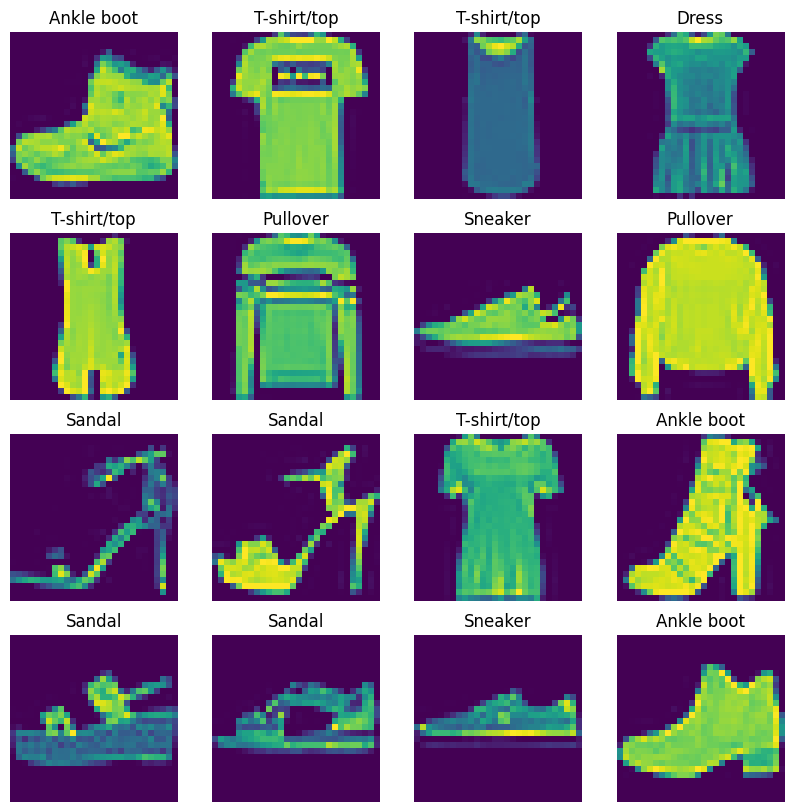

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i].astype("uint8"))
    plt.title(labels[y_train[i]])
    plt.axis("off")

## Предобработка

**Нормализуйте данные X_train и X_test**

In [5]:
import numpy as np

# Текущие граничные значения канала RGB
print(np.min(x_train[0]), np.max(x_train[0]))
print(np.min(x_test[0]), np.max(x_test[0]))

0 255
0 255


In [6]:
import tensorflow as tf
from tensorflow.keras import layers

# Слой нормализации
normalization_layer = layers.Rescaling(1./255)

In [7]:
# Нормализация
normalization_func = lambda x: normalization_layer(x)
x_train = normalization_func(x_train)
x_test = normalization_func(x_test)

2023-09-28 20:16:32.361322: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [8]:
# Текущие граничные значения канала RGB
print(np.min(x_train[0]), np.max(x_train[0]))
print(np.min(x_test[0]), np.max(x_test[0]))

0.0 1.0
0.0 1.0


**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [9]:
# Текущая форма массива x_train
print(x_train.shape)
# Текущая форма массива x_test
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [11]:
# Текущая форма массива x_train
print(x_train.shape)
# Текущая форма массива x_test
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Преобразуйте  y_train и y_test в one_hot представления**

In [12]:
# Уникальные категории в y_train
cat_unique = np.unique(y_train)
print(cat_unique)

[0 1 2 3 4 5 6 7 8 9]


In [13]:
from keras.utils import to_categorical

# Отображение one_hot представления для категорий
cat_unique = to_categorical(cat_unique)
print(cat_unique)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [14]:
# Преобразование в one_hot представление
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU

* Выходной полносвязный слой с 10 нейронами с softmax

In [15]:
model = tf.keras.Sequential([
    # Сверточный слой 32 фильтра с размером ядра (4,4) с функцией активации  ReLu 
    # и форматом входных данных в виде изображений 28х28 пикселей с одним цветовым каналом (градации серого)
    layers.Conv2D(32, (4,4), padding='same', activation='relu', input_shape=(28, 28, 1)),
    # Пулинг с pool_size = (2,2) c двумя strides – шагами сканирования по координатам плоскости
    layers.MaxPooling2D((2, 2), strides=2),
    # Выпрямляющий слой
    layers.Flatten(input_shape=(28, 28)),
    # Полносвязный слой - 128 нейронов с функцией активации ReLu
    layers.Dense(128, activation='relu'),
    # Выходной полносвязный слой с 10 нейронами с функцией активации softmax
    layers.Dense(10, activation='softmax')
])

In [16]:
# Вывод структуры модели
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804778 (3.07 MB)
Trainable params: 804778 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [17]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Отрисовка фильтров на слое Conv2D до обучения модели

In [18]:
from matplotlib import pyplot

def visualize_conv2d_filters(model):    
    layer = model.layers[0]
    # Получение весов фильтра
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    # Нормализация фильтров
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    columns = 4
    rows = 8
    n_filters = 32
    for i in range(n_filters):
        # Получение фильтров
        f = filters[:, :, :, i]
        # Отрисовка
        ax = pyplot.subplot(rows, columns, i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:, :, 0], cmap='gray')
    pyplot.show()

conv2d (4, 4, 1, 32)


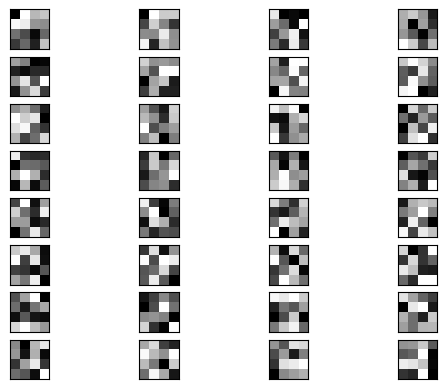

In [19]:
visualize_conv2d_filters(model)

Слой имеет фильтры размером 4х4. Одноканальное представление цвета. Количество фильтров 32.

Темные квадраты обозначают малые или тормозящие веса, а светлые квадраты обозначают большие или возбуждающие веса.

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [20]:
his = model.fit(x_train, y_train, batch_size=32, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3865 - accuracy: 0.8632
Epoch 2/7
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2607 - accuracy: 0.9068
Epoch 3/7
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2189 - accuracy: 0.9204
Epoch 4/7
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1926 - accuracy: 0.9299
Epoch 5/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1714 - accuracy: 0.9372
Epoch 6/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1558 - accuracy: 0.9437
Epoch 7/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1407 - accuracy: 0.9493


### Отрисовка фильтров на слое Conv2D после обучения модели

conv2d (4, 4, 1, 32)


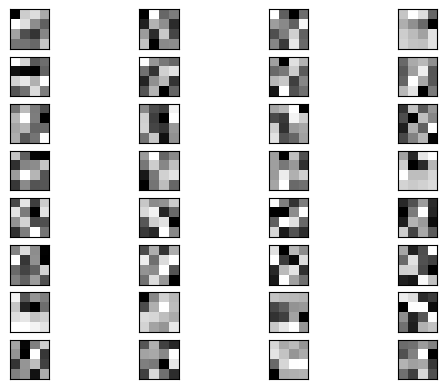

In [21]:
visualize_conv2d_filters(model)

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test**

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nТочность на тестовых данных:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3186 - accuracy: 0.9083

Точность на тестовых данных: 0.90829998254776


Получается, что точность на тестовом наборе данных немного меньше, чем точность на обучающем наборе данных. Этот разрыв между точностью обучения и точностью теста представляет собой переобучение. Переобучение происходит, когда модель машинного обучения работает хуже с новыми, ранее невиданными входными данными, чем с обучающими данными.

In [23]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [24]:
# Получаем набор вероятностей определения каждой катагории
print(predictions)

[[7.5622012e-08 1.6156512e-11 1.4338217e-08 ... 3.2940197e-06
  2.9035885e-09 9.9999589e-01]
 [1.3212588e-06 7.3843571e-18 9.9999481e-01 ... 1.7672702e-14
  1.9078837e-15 1.8770319e-13]
 [2.1762978e-09 9.9999994e-01 2.6450352e-12 ... 1.2527943e-14
  1.8935437e-12 2.2588396e-12]
 ...
 [8.3341989e-10 7.0316406e-15 1.0402728e-09 ... 6.3978236e-09
  9.9999970e-01 2.9394179e-13]
 [1.6819860e-12 9.9999994e-01 1.8257428e-13 ... 3.9467488e-19
  1.5631512e-17 7.7927106e-14]
 [2.0035298e-03 2.6713040e-05 6.0956338e-03 ... 3.5202350e-02
  9.1264201e-03 4.4287955e-03]]


In [25]:
# Находим максимальные вероятности в наборе предсказаний
predictions = np.argmax(predictions, axis=-1)

In [26]:
print(predictions)

[9 2 1 ... 8 1 5]


In [27]:
# Переводим предсказания в представление one_hot
predictions = to_categorical(predictions)
print(predictions)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
# Смотрим референсные данные для тестового набора
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
# Отображаем оценку модели
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions, target_names=labels))

              precision    recall  f1-score   support

 T-shirt/top       0.92      0.78      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.91      0.80      0.85      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.87      0.85      0.86      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.66      0.85      0.74      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000
 samples avg       0.91      0.91      0.91     10000



## Дополнительно

* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

*Отрисовка фильтров (данное дополнительное задание) выполнено выше до и после обучения модели в отдельных блоках **Отрисовка фильтров на слое Conv2D***